## Imports required to use Twitter developer data

In [ ]:
!pip install Twython

In [1]:
from twython import Twython, TwythonError
import pandas as pd
import networkx as nx

# Authenticating on Twitter Developer

In [ ]:
# open the keys file
my_file = open("keys.txt", "r")

# read the raw data
content = my_file.read()

# split all lines by  newline character
API_KEY, API_SECRET_KEY = content.split("\n")

# close the file
my_file.close()

In [ ]:
twitter = Twython(API_KEY, API_SECRET_KEY)

authentication_tokens = twitter.get_authentication_tokens()
print(authentication_tokens['auth_url'])

https://api.twitter.com/oauth/authenticate?oauth_token=WC5HYAAAAAABY66kAAABfv3MbIU


In [ ]:
# Replace the verifier with the pin number obtained with your web browser in the previous step
VERIFIER = '2461519'

twitter = Twython(API_KEY, API_SECRET_KEY,
                  authentication_tokens['oauth_token'],
                  authentication_tokens['oauth_token_secret'])

authorized_tokens = twitter.get_authorized_tokens(VERIFIER)

In [ ]:
twitter = Twython(API_KEY, API_SECRET_KEY,
                  authorized_tokens['oauth_token'],
                  authorized_tokens['oauth_token_secret'])

twitter.verify_credentials()

# Getting data of last interactions

In [2]:
# Getting List of twits used in the last interactions
list_in_csv = pd.read_csv('list_twits_used')
twit_used = []
twit_used.extend(list_in_csv.loc[:,'id'])

# Getting Graph in the last interactions
D = nx.read_graphml('GraphOlympics.graphml')

# Let's do something amazing!

## Taking Tweets

- Inglês – olympics
- Chinês mandarim – 奧運會
- Hindi – ओलंपिक
- Espanhol – olimpicos
- Árabe padrão – دورة الالعاب الاولمبية
- Bengali – অলিম্পিক
- Francês – olympiques
- Russo – Олимпийские игры
- Português – olimpiadas
- Japonês – オリンピック

In [ ]:
import itertools

In [ ]:
NUM_TWEETS_TO_FETCH = 1000

In [ ]:
cursor_ingles = twitter.cursor(twitter.search, q='olympics', count=100, result_type='mixed')
search_tweets_ingles = list(itertools.islice(cursor_ingles, NUM_TWEETS_TO_FETCH))
len(search_tweets_ingles)

1000

In [ ]:
cursor_mandarim = twitter.cursor(twitter.search, q='奧運會', count=100, result_type='mixed')
search_tweets_mandarim = list(itertools.islice(cursor_mandarim, NUM_TWEETS_TO_FETCH))
len(search_tweets_mandarim)

1000

In [ ]:
cursor_hindi = twitter.cursor(twitter.search, q='ओलंपिक', count=100, result_type='mixed')
search_tweets_hindi = list(itertools.islice(cursor_hindi, NUM_TWEETS_TO_FETCH))
len(search_tweets_hindi)

150

In [ ]:
cursor_espanhol = twitter.cursor(twitter.search, q='olimpicos', count=100, result_type='mixed')
search_tweets_espanhol = list(itertools.islice(cursor_espanhol, NUM_TWEETS_TO_FETCH))
len(search_tweets_espanhol)

1000

In [ ]:
cursor_arabe = twitter.cursor(twitter.search, q='دورة الالعاب الاولمبية', count=100, result_type='mixed')
search_tweets_arabe = list(itertools.islice(cursor_arabe, NUM_TWEETS_TO_FETCH))
len(search_tweets_arabe)

585

In [ ]:
cursor_bengali = twitter.cursor(twitter.search, q='অলিম্পিক', count=100, result_type='mixed')
search_tweets_bengali = list(itertools.islice(cursor_bengali, NUM_TWEETS_TO_FETCH))
len(search_tweets_bengali)

7

In [ ]:
cursor_frances = twitter.cursor(twitter.search, q='olympiques', count=100, result_type='mixed')
search_tweets_frances = list(itertools.islice(cursor_frances, NUM_TWEETS_TO_FETCH))
len(search_tweets_frances)

1000

In [ ]:
cursor_russo = twitter.cursor(twitter.search, q='Олимпийские игры', count=100, result_type='mixed')
search_tweets_russo = list(itertools.islice(cursor_russo, NUM_TWEETS_TO_FETCH))
len(search_tweets_russo)

1000

In [ ]:
cursor_portugues = twitter.cursor(twitter.search, q='olimpiadas', count=100, result_type='mixed')
search_tweets_portugues = list(itertools.islice(cursor_portugues, NUM_TWEETS_TO_FETCH))
len(search_tweets_portugues)

1000

In [ ]:
cursor_japones = twitter.cursor(twitter.search, q='オリンピック競技', count=100, result_type='mixed')
search_tweets_japones = list(itertools.islice(cursor_japones, NUM_TWEETS_TO_FETCH))
len(search_tweets_japones)

1000

In [ ]:
# limit status I can get
twitter.get_application_rate_limit_status()['resources']['search']

{'/search/tweets': {'limit': 180, 'remaining': 95, 'reset': 1644936474}}

## Append data in Graph

In [ ]:
# Used on the first day where no data was collected
D = nx.DiGraph()
twit_used = []

In [ ]:
# number of tweets used now
len(twit_used)

37085

In [ ]:
# Getting tweets in english
for tweet in search_tweets_ingles:
    tweet_sn = tweet['user']['screen_name']
    if tweet['id'] not in twit_used:
        for user_mention in tweet['entities']['user_mentions']:
            mentioned_sn = user_mention['screen_name']
            
            twit_used.append(tweet['id'])
            my_edge = (tweet_sn, mentioned_sn)
            if D.has_edge(*my_edge):
                D.edges[my_edge]['weight'] += 1
            else:
                D.add_edge(*my_edge, weight=1)

# Getting tweets in Mandarin
for tweet in search_tweets_mandarim:
    tweet_sn = tweet['user']['screen_name']
    if tweet['id'] not in twit_used:
        for user_mention in tweet['entities']['user_mentions']:
            mentioned_sn = user_mention['screen_name']
            
            twit_used.append(tweet['id'])
            my_edge = (tweet_sn, mentioned_sn)
            if D.has_edge(*my_edge):
                D.edges[my_edge]['weight'] += 1
            else:
                D.add_edge(*my_edge, weight=1)                

# Getting tweets in Hindi
for tweet in search_tweets_hindi:
    tweet_sn = tweet['user']['screen_name']
    if tweet['id'] not in twit_used:
        for user_mention in tweet['entities']['user_mentions']:
            mentioned_sn = user_mention['screen_name']
            
            twit_used.append(tweet['id'])
            my_edge = (tweet_sn, mentioned_sn)
            if D.has_edge(*my_edge):
                D.edges[my_edge]['weight'] += 1
            else:
                D.add_edge(*my_edge, weight=1)     

# Getting tweets in spanish
for tweet in search_tweets_espanhol:
    tweet_sn = tweet['user']['screen_name']
    if tweet['id'] not in twit_used:
        for user_mention in tweet['entities']['user_mentions']:
            mentioned_sn = user_mention['screen_name']
            
            twit_used.append(tweet['id'])
            my_edge = (tweet_sn, mentioned_sn)
            if D.has_edge(*my_edge):
                D.edges[my_edge]['weight'] += 1
            else:
                D.add_edge(*my_edge, weight=1)         

# Getting tweets in Arabic
for tweet in search_tweets_arabe:
    tweet_sn = tweet['user']['screen_name']
    if tweet['id'] not in twit_used:
        for user_mention in tweet['entities']['user_mentions']:
            mentioned_sn = user_mention['screen_name']
            
            twit_used.append(tweet['id'])
            my_edge = (tweet_sn, mentioned_sn)
            if D.has_edge(*my_edge):
                D.edges[my_edge]['weight'] += 1
            else:
                D.add_edge(*my_edge, weight=1)                       

# Getting tweets in Bengali
for tweet in search_tweets_bengali:
    tweet_sn = tweet['user']['screen_name']
    if tweet['id'] not in twit_used:
        for user_mention in tweet['entities']['user_mentions']:
            mentioned_sn = user_mention['screen_name']
            
            twit_used.append(tweet['id'])
            my_edge = (tweet_sn, mentioned_sn)
            if D.has_edge(*my_edge):
                D.edges[my_edge]['weight'] += 1
            else:
                D.add_edge(*my_edge, weight=1)             

# Getting tweets in French
for tweet in search_tweets_frances:
    tweet_sn = tweet['user']['screen_name']
    if tweet['id'] not in twit_used:
        for user_mention in tweet['entities']['user_mentions']:
            mentioned_sn = user_mention['screen_name']
            
            twit_used.append(tweet['id'])
            my_edge = (tweet_sn, mentioned_sn)
            if D.has_edge(*my_edge):
                D.edges[my_edge]['weight'] += 1
            else:
                D.add_edge(*my_edge, weight=1)   

# Getting tweets in Russian      
for tweet in search_tweets_russo:
    tweet_sn = tweet['user']['screen_name']
    if tweet['id'] not in twit_used:
        for user_mention in tweet['entities']['user_mentions']:
            mentioned_sn = user_mention['screen_name']
            
            twit_used.append(tweet['id'])
            my_edge = (tweet_sn, mentioned_sn)
            if D.has_edge(*my_edge):
                D.edges[my_edge]['weight'] += 1
            else:
                D.add_edge(*my_edge, weight=1)    

# Getting tweets in Portuguese
for tweet in search_tweets_portugues:
    tweet_sn = tweet['user']['screen_name']
    if tweet['id'] not in twit_used:
        for user_mention in tweet['entities']['user_mentions']:
            mentioned_sn = user_mention['screen_name']
            
            twit_used.append(tweet['id'])
            my_edge = (tweet_sn, mentioned_sn)
            if D.has_edge(*my_edge):
                D.edges[my_edge]['weight'] += 1
            else:
                D.add_edge(*my_edge, weight=1)     

# Getting tweets in Japanese
for tweet in search_tweets_japones:
    tweet_sn = tweet['user']['screen_name']
    if tweet['id'] not in twit_used:
        for user_mention in tweet['entities']['user_mentions']:
            mentioned_sn = user_mention['screen_name']
            
            twit_used.append(tweet['id'])
            my_edge = (tweet_sn, mentioned_sn)
            if D.has_edge(*my_edge):
                D.edges[my_edge]['weight'] += 1
            else:
                D.add_edge(*my_edge, weight=1)                                                                  

In [ ]:
# number of tweets used now
len(twit_used)

41298

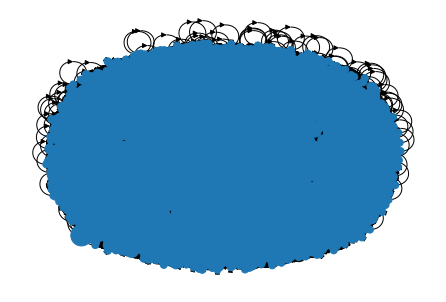

In [ ]:
# Draw graph of out degree
node_sizes = [D.out_degree(n, weight='weight') * 50 for n in D.nodes]

%matplotlib inline
nx.draw(D, node_size=node_sizes)

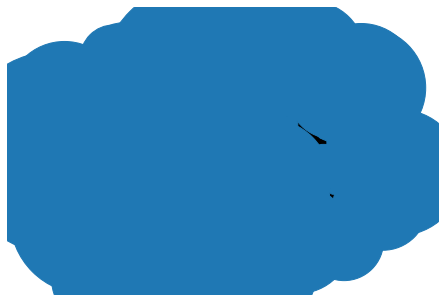

In [3]:
# Draw graph of in degree
node_sizes = [D.in_degree(n, weight='weight') * 50 for n in D.nodes]

%matplotlib inline
nx.draw(D, node_size=node_sizes)

## Saving data to including more next time

In [ ]:
# Search tweets
dict_ = {'id': []}
for tweet in twit_used:
    dict_['id'].append(tweet)

# Structure data in a pandas DataFrame for easier manipulation
df = pd.DataFrame(dict_)

# Save list of twits usedin csv to export next time
df.to_csv('list_twits_used')

# Save Graph to export next time
nx.write_graphml(D, 'GraphOlympics.graphml')

In [ ]:
len(D.nodes)

38119

# Taking the top three most cited

In [ ]:
# Who else is mentioned
from operator import itemgetter

sorted(D.out_degree(weight='weight'), key=itemgetter(1), reverse=True)[:3]

[('MichelidaSilva_', 62), ('TheOneAngels', 47), ('bb_vyld', 29)]

In [ ]:
# Who else mentions
sorted(D.in_degree(weight='weight'), key=itemgetter(1), reverse=True)[:3]

[('Japan_Olympic', 929), ('Olympics', 820), ('francetvsport', 742)]